# Why Use LSTM for Gait Analysis?

LSTM (Long Short-Term Memory) networks are ideal for time-series data like gait patterns.

Unlike traditional ML models, LSTMs learn temporal dependencies, making them great for step variability detection.
                                                                                  
Detects gait irregularities by analyzing patterns in step sequences over time.


# Prepare Simulated Gait Data

We will simulate time-series gait acceleration data with variations for healthy and dementia-affected individuals.

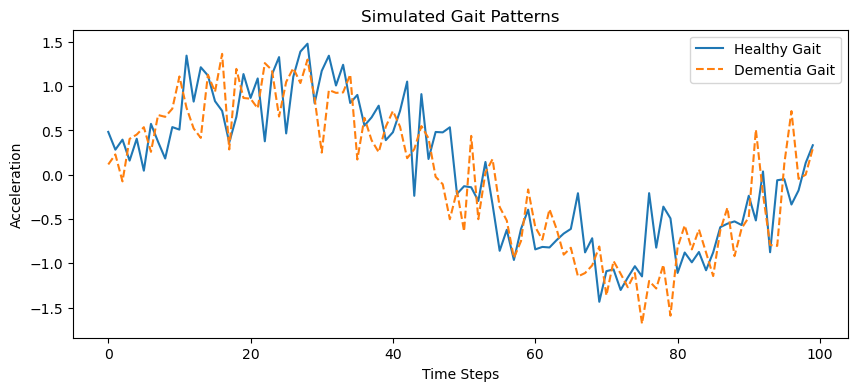

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic gait data
np.random.seed(42)
timesteps = 100  # 100 time steps per sequence
num_samples = 500  # 500 sequences (patients)

# Healthy gait: Smooth, consistent step patterns
healthy_gait = [np.sin(2 * np.pi * 1.2 * np.linspace(0, 1, timesteps)) + 0.1 * np.random.randn(timesteps) for _ in range(num_samples//2)]

# Dementia gait: Irregular step patterns, high variability
dementia_gait = [np.sin(2 * np.pi * (1.2 + 0.3 * np.random.randn()) * np.linspace(0, 1, timesteps)) +
                  0.3 * np.random.randn(timesteps) for _ in range(num_samples//2)]

# Combine and create labels (0 = Healthy, 1 = Dementia)
X = np.array(healthy_gait + dementia_gait)
y = np.array([0] * (num_samples//2) + [1] * (num_samples//2))

# Shuffle dataset
indices = np.arange(num_samples)
np.random.shuffle(indices)
X, y = X[indices], y[indices]

# Plot example gait signals
plt.figure(figsize=(10, 4))
plt.plot(X[0], label="Healthy Gait")
plt.plot(X[-1], label="Dementia Gait", linestyle="dashed")
plt.legend()
plt.title("Simulated Gait Patterns")
plt.xlabel("Time Steps")
plt.ylabel("Acceleration")
plt.show()

Healthy Gait: Smooth sinusoidal step pattern with small noise.

Dementia Gait: Irregular step timing and higher noise.

Labels: 0 = Healthy, 1 = Dementia.

# Preprocess Data for LSTM

LSTM expects 3D input data: (samples, timesteps, features).

We normalize the data and reshape it.

In [7]:
# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, timesteps)).reshape(-1, timesteps, 1)
X_test = scaler.transform(X_test.reshape(-1, timesteps)).reshape(-1, timesteps, 1)

# Reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], timesteps, 1))
X_test = X_test.reshape((X_test.shape[0], timesteps, 1))

# Build and Train LSTM Model

LSTM layers learn time dependencies in step sequences.
    
Dense output classifies as Healthy (0) or Dementia (1).

In [12]:
# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(timesteps, 1)),  # First LSTM layer
    LSTM(32, return_sequences=False),  # Second LSTM layer
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")  # Output (Binary Classification)
])

# Compile model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

C:\Users\fardo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.7501 - loss: 0.6178 - val_accuracy: 0.9800 - val_loss: 0.3283
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9720 - loss: 0.2442 - val_accuracy: 0.9500 - val_loss: 0.1957
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9545 - loss: 0.1593 - val_accuracy: 0.9800 - val_loss: 0.0724
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9691 - loss: 0.1130 - val_accuracy: 0.9900 - val_loss: 0.0608
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9731 - loss: 0.0879 - val_accuracy: 0.9900 - val_loss: 0.0482
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9795 - loss: 0.0753 - val_accuracy: 0.9900 - val_loss: 0.0585
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9719 - loss: 0.1050 - val_accuracy: 0.9600 - val_loss: 0.1192
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9679 - loss: 0.1398 - val_accuracy: 0.9900 -

First LSTM Layer: Captures step variations over time.
    
Second LSTM Layer: Extracts gait irregularities.
    
Dense Layers: Make final prediction (0 = Healthy, 1 = Dementia).

Binary Crossentropy Loss: Suitable for binary classification.
    
Adam Optimizer: Efficient learning method.

# Evaluate Model Performance

We check accuracy and loss trends.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9939 - loss: 0.0437
Test Accuracy: 99.00%


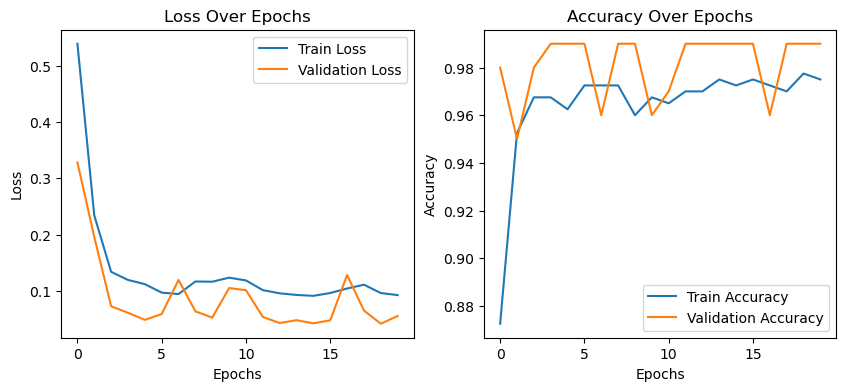

In [16]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot training loss and accuracy
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

# Test Model on New Gait Data

We simulate new gait sequences and predict dementia risk.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step
Predicted Condition: Dementia (Confidence: 99.98%)


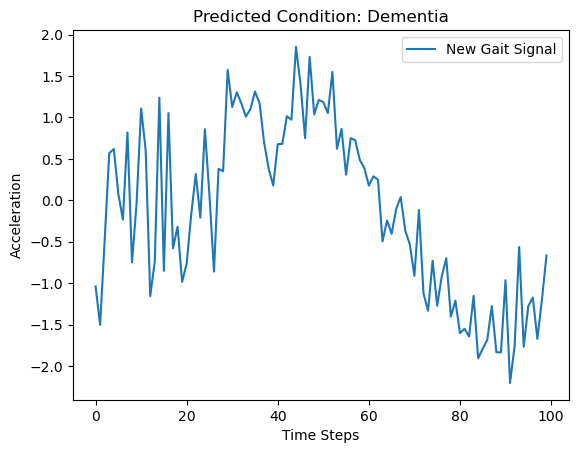

In [21]:
# Generate new sample (random gait)
new_gait = np.sin(2 * np.pi * 1.0 * np.linspace(0, 1, timesteps)) + 0.2 * np.random.randn(timesteps)
new_gait = scaler.transform(new_gait.reshape(1, -1)).reshape(1, timesteps, 1)

# Predict
prediction = model.predict(new_gait)
dementia_risk = "Dementia" if prediction > 0.5 else "Healthy"
print(f"Predicted Condition: {dementia_risk} (Confidence: {prediction[0][0]*100:.2f}%)")

# Plot new gait pattern
plt.plot(new_gait.flatten(), label="New Gait Signal")
plt.title(f"Predicted Condition: {dementia_risk}")
plt.xlabel("Time Steps")
plt.ylabel("Acceleration")
plt.legend()
plt.show()